# *Exploratory Data Analysis (EDA):*

Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. 
    Visualization tools can be used to communicate their findings effectively.

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
df = pd.read_csv('automobile.csv')

In [4]:
df1 = df.copy()
df2 = df.copy()

In [5]:
df1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

In [8]:
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [49]:
# Replace non-numeric values ('?') with NaN
df1['horsepower'] = df1['horsepower'].replace('?', np.nan)
df1['curb-weight'] = df1['curb-weight'].replace('?', np.nan)

# Convert columns to numeric, forcing errors to NaN
df1['horsepower'] = pd.to_numeric(df1['horsepower'], errors='coerce')
df1['curb-weight'] = pd.to_numeric(df1['curb-weight'], errors='coerce')


# Drop rows where any of the critical features or price are missing
df1.dropna(subset=['horsepower', 'engine-size', 'curb-weight', 'price'], inplace=True)

In [11]:
df1['price'].value_counts() 

price
16500    2
6692     2
6229     2
7957     2
5572     2
        ..
18420    1
16845    1
19045    1
21485    1
22470    1
Name: count, Length: 184, dtype: int64

In [12]:
df1['body-style'].value_counts()

body-style
sedan          95
hatchback      67
wagon          24
hardtop         8
convertible     6
Name: count, dtype: int64

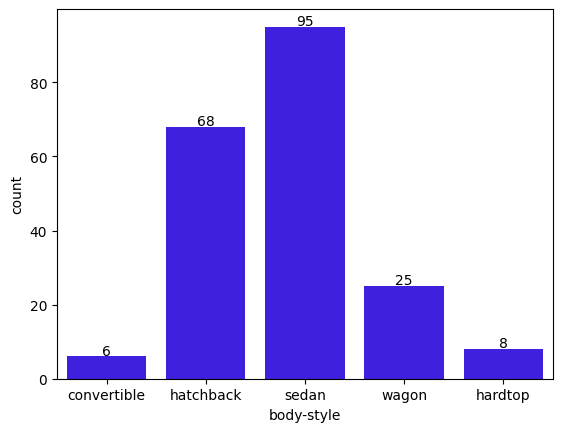

In [19]:
sns.countplot(x=df['body-style'], color='#2B00FF') #29ec06

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2,  # x-coordinate
             p.get_height() + .5,            # y-coordinate
             int(p.get_height()),           # The count value
             ha='center')                   # Center alignment

plt.show()

<Axes: xlabel='engine-location', ylabel='count'>

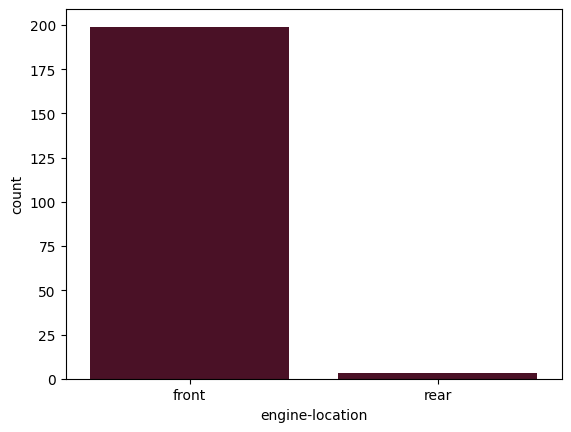

In [43]:
sns.countplot(x=df['engine-location'], color='#540723')

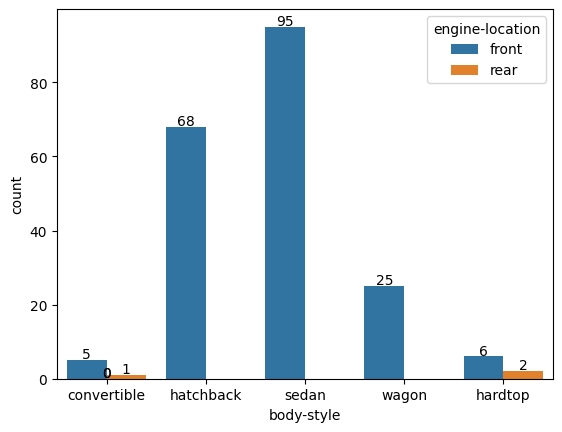

In [45]:
sns.countplot( x = 'body-style' , hue = 'engine-location' , data = df)  # Churn is class column


for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2,  # x-coordinate
             p.get_height() + .5,            # y-coordinate
             int(p.get_height()),           # The count value
             ha='center')                   # Center alignment

plt.show()

<Axes: xlabel='body-style', ylabel='count'>

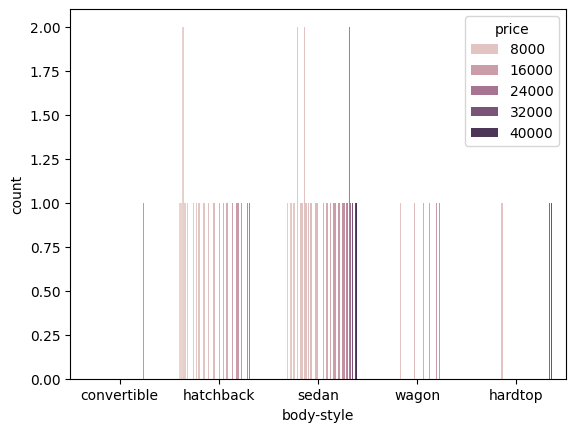

In [35]:
sns.countplot( x = 'body-style' , hue = 'price' , data = df)  # Churn is class column

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
reg = LinearRegression()

In [50]:
reg = LinearRegression().fit(df1[['horsepower']],df1['price'])

In [52]:
reg.coef_                       #value of m 

array([172.49160067])

In [53]:
reg.intercept_                 #value of c

np.float64(-4553.916088806327)

In [54]:
reg.predict(df1[['horsepower']]) 

array([14592.65158502, 14592.65158502, 22009.79041362, 13040.22717904,
       15282.61798768, 14420.15998436, 14420.15998436, 14420.15998436,
       19594.90800431, 12867.73557837, 12867.73557837, 16317.56759167,
       16317.56759167, 16317.56759167, 26839.55523224, 26839.55523224,
       26839.55523224,  3725.68074312,  7520.49595775,  7520.49595775,
        7175.51275642,  7175.51275642, 13040.22717904,  7175.51275642,
        7175.51275642,  7175.51275642, 13040.22717904, 10625.34476972,
       20457.36600764,  5450.59674977,  8555.44556174,  5795.5799511 ,
        8555.44556174,  8555.44556174,  8555.44556174,  8555.44556174,
       10280.36156839, 10280.36156839, 10280.36156839, 10280.36156839,
       12867.73557837, 12695.24397771,  8900.42876307, 10970.32797105,
       25804.60562825, 25804.60562825, 40638.88328545,  7175.51275642,
        7175.51275642,  7175.51275642,  7175.51275642,  7175.51275642,
       12867.73557837, 12867.73557837, 12867.73557837, 18732.45000098,
      

Text(0.5, 1.0, 'HP VS. Price')

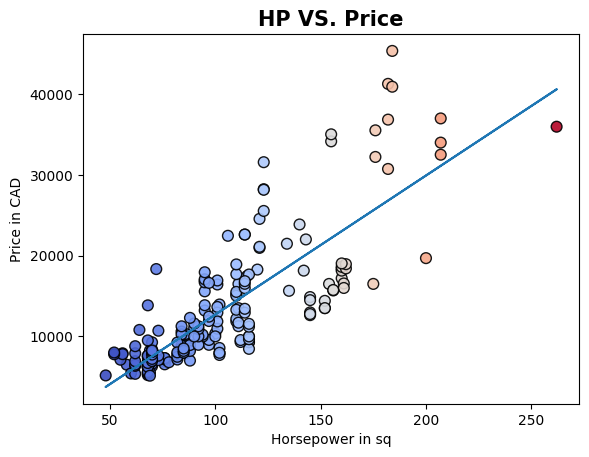

In [56]:
# show the actual x,y value with predicted linear regression line

plt.plot(df1[['horsepower']], reg.predict(df1[['horsepower']]))

plt.scatter(df1['horsepower'], 
            df1['price'], 
            c=df1['horsepower'], 
            cmap='coolwarm', 
            s=60, 
            alpha=.90,
            edgecolor='k') #shift + tab

plt.xlabel('Horsepower in sq', fontsize=10)
plt.ylabel('Price in CAD',fontsize=10)
plt.title('HP VS. Price',fontsize=15, weight='bold')

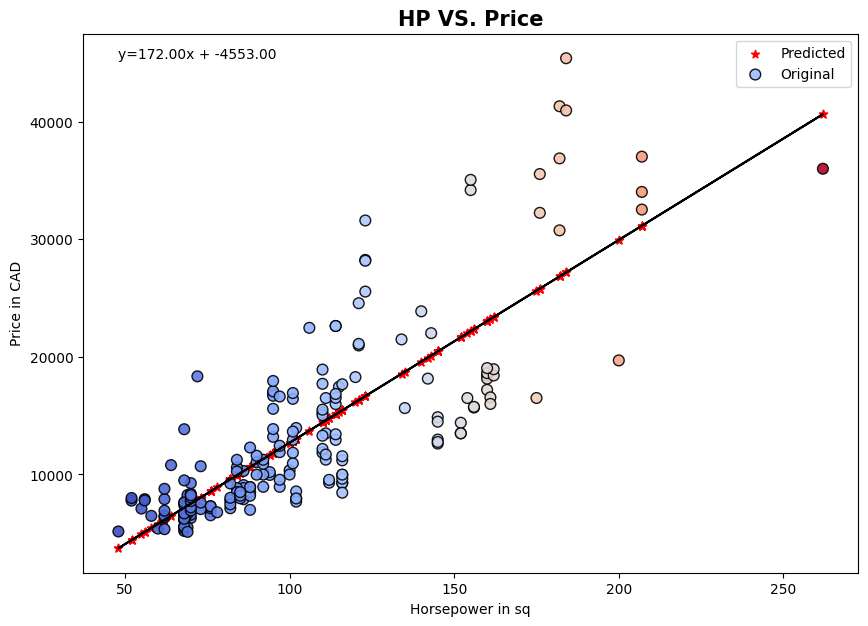

In [57]:
plt.figure(figsize=(10,7))

m = reg.coef_[0]
c = reg.intercept_
equ = f"y={int(m):.2f}x + {int(c):.2f}"

plt.text(min(df1['horsepower']), max(df1['price'])-50, equ)

plt.scatter(df1['horsepower'],reg.predict(df1[['horsepower']]),color='red', marker='*', label='Predicted') #shift + tab

plt.scatter(df1['horsepower'],reg.predict(df1[['horsepower']]),color='red', marker='*') #shift + tab

plt.scatter(df1['horsepower'], 
            df1['price'], 
            c=df1['horsepower'], 
            cmap='coolwarm', 
            s=60, 
            alpha=.90,
            edgecolor='k',
            label='Original') #shift + tab

plt.xlabel('Horsepower in sq', fontsize=10)
plt.ylabel('Price in CAD',fontsize=10)
plt.title('HP VS. Price',fontsize=15, weight='bold')

plt.plot(df1['horsepower'], reg.predict(df1[['horsepower']]), color='black')

plt.legend()
plt.show()

In [36]:
df1.select_dtypes(include =['number']).corr()  # show the datatypes that only has integers columns

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.531064,-0.543304,-0.371357,-0.251796,-0.548270,-0.238202,-0.112967,-0.180225,0.073553,-0.027946,0.042095,-0.090311
normalized-losses,0.531064,1.000000,-0.082988,0.016348,0.096067,-0.434269,0.113232,0.163334,-0.131651,0.292232,-0.251550,-0.204832,0.191829
wheel-base,-0.543304,-0.082988,1.000000,0.880230,0.819201,0.593805,0.783429,0.571834,0.245887,0.371294,-0.476517,-0.545842,0.587527
length,-0.371357,0.016348,0.880230,1.000000,0.858301,0.496704,0.882272,0.684674,0.159908,0.579834,-0.666689,-0.700293,0.696091
width,-0.251796,0.096067,0.819201,0.858301,1.000000,0.312294,0.867441,0.727965,0.189059,0.614075,-0.635309,-0.682411,0.755812
height,-0.548270,-0.434269,0.593805,0.496704,0.312294,1.000000,0.310202,0.076654,0.258975,-0.086282,-0.054595,-0.107817,0.138500
curb-weight,-0.238202,0.113232,0.783429,0.882272,0.867441,0.310202,1.000000,0.848698,0.155089,0.757491,-0.751455,-0.795725,0.835948
engine-size,-0.112967,0.163334,0.571834,0.684674,0.727965,0.076654,0.848698,1.000000,0.029068,0.822791,-0.650494,-0.679732,0.872613
compression-ratio,-0.180225,-0.131651,0.245887,0.159908,0.189059,0.258975,0.155089,0.029068,1.000000,-0.214757,0.330612,0.269039,0.068310
horsepower,0.073553,0.292232,0.371294,0.579834,0.614075,-0.086282,0.757491,0.822791,-0.214757,1.000000,-0.821910,-0.804222,0.809232


In [37]:
df1.corr(numeric_only=True)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.531064,-0.543304,-0.371357,-0.251796,-0.548270,-0.238202,-0.112967,-0.180225,0.073553,-0.027946,0.042095,-0.090311
normalized-losses,0.531064,1.000000,-0.082988,0.016348,0.096067,-0.434269,0.113232,0.163334,-0.131651,0.292232,-0.251550,-0.204832,0.191829
wheel-base,-0.543304,-0.082988,1.000000,0.880230,0.819201,0.593805,0.783429,0.571834,0.245887,0.371294,-0.476517,-0.545842,0.587527
length,-0.371357,0.016348,0.880230,1.000000,0.858301,0.496704,0.882272,0.684674,0.159908,0.579834,-0.666689,-0.700293,0.696091
width,-0.251796,0.096067,0.819201,0.858301,1.000000,0.312294,0.867441,0.727965,0.189059,0.614075,-0.635309,-0.682411,0.755812
height,-0.548270,-0.434269,0.593805,0.496704,0.312294,1.000000,0.310202,0.076654,0.258975,-0.086282,-0.054595,-0.107817,0.138500
curb-weight,-0.238202,0.113232,0.783429,0.882272,0.867441,0.310202,1.000000,0.848698,0.155089,0.757491,-0.751455,-0.795725,0.835948
engine-size,-0.112967,0.163334,0.571834,0.684674,0.727965,0.076654,0.848698,1.000000,0.029068,0.822791,-0.650494,-0.679732,0.872613
compression-ratio,-0.180225,-0.131651,0.245887,0.159908,0.189059,0.258975,0.155089,0.029068,1.000000,-0.214757,0.330612,0.269039,0.068310
horsepower,0.073553,0.292232,0.371294,0.579834,0.614075,-0.086282,0.757491,0.822791,-0.214757,1.000000,-0.821910,-0.804222,0.809232


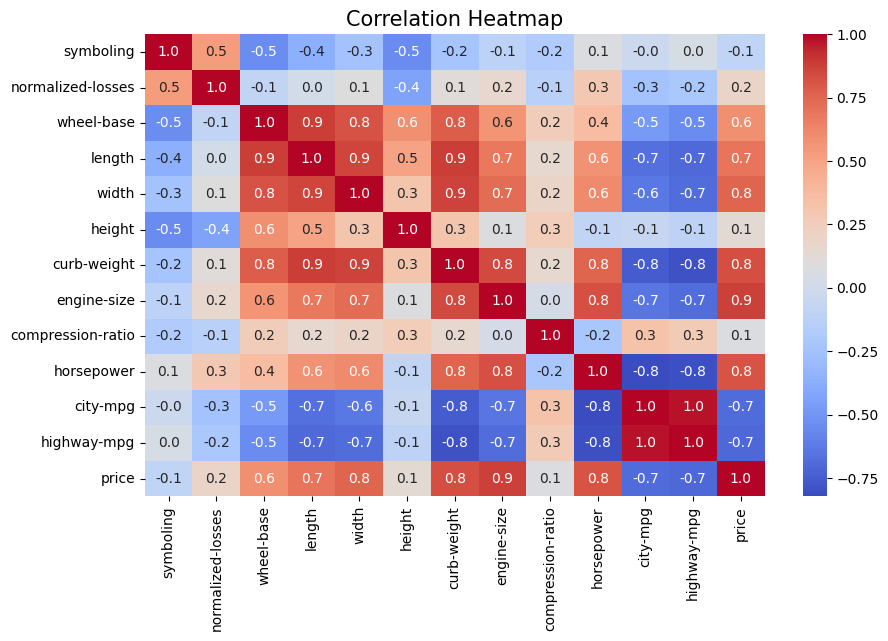

In [41]:
plt.figure(figsize=(10, 6)) 

sns.heatmap(df1.corr(numeric_only=True), 
            annot=True,        # Annotate with correlation values
            fmt=".1f",         # Format the correlation values
            cmap='coolwarm',   # Choose a color map
            cbar=True)         # Display the color bar

plt.title('Correlation Heatmap', fontsize=15)
plt.show()